## Analysis of XRP data based on rolling averages

In [9]:
import pandas as pd
import numpy as np

In [10]:
import re

In [11]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [12]:
XRP_increase = pd.read_csv("XRP_Increase_SmallAmount.csv")

In [13]:
XRP_decrease = pd.read_csv("XRP_Decrease_SmallAmount.csv")

In [15]:
try:
    del XRP_increase['Decrease_0.1_percent']
except:
    print('Not found')

Not found


In [8]:
#### For getting rid of rounding error

In [9]:
regex = r"[0000]+[0-9]+[_]"

In [10]:
for col in [d for d in XRP_decrease.columns if '_percent' in d]:
    print(col , ',,' , re.sub(regex, '_',col))
    XRP_decrease.rename(columns= {col : re.sub(regex, '_',col)}, inplace = True)

Decrease_0.1_percent ,, Decrease_0.1_percent
Decrease_0.2_percent ,, Decrease_0.2_percent
Decrease_0.30000000000000004_percent ,, Decrease_0.3_percent
Decrease_0.4_percent ,, Decrease_0.4_percent
Decrease_0.5_percent ,, Decrease_0.5_percent
Decrease_0.6000000000000001_percent ,, Decrease_0.6_percent
Decrease_0.8_percent ,, Decrease_0.8_percent
Decrease_1.0_percent ,, Decrease_1.0_percent
Decrease_1.5_percent ,, Decrease_1.5_percent


In [11]:
for col in [d for d in XRP_increase.columns if '_percent' in d]:
    print(col , ',,' , re.sub(regex, '_',col))
    XRP_increase.rename(columns= {col : re.sub(regex, '_',col)}, inplace = True)

Increase_0.1_percent ,, Increase_0.1_percent
Increase_0.2_percent ,, Increase_0.2_percent
Increase_0.30000000000000004_percent ,, Increase_0.3_percent
Increase_0.4_percent ,, Increase_0.4_percent
Increase_0.5_percent ,, Increase_0.5_percent
Increase_0.6000000000000001_percent ,, Increase_0.6_percent
Increase_0.8_percent ,, Increase_0.8_percent
Increase_1.0_percent ,, Increase_1.0_percent
Increase_1.5_percent ,, Increase_1.5_percent


In [12]:
list(np.intersect1d(XRP_decrease.columns,XRP_increase.columns))

['Unnamed: 0',
 'Unnamed: 0.1',
 'close',
 'date',
 'datetime_real',
 'high',
 'low',
 'open',
 'quoteVolume',
 'volume',
 'weightedAverage']

In [13]:
[d for d in XRP_decrease.columns if '_percent' in d]

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.5_percent']

In [14]:
intersect_columns = [d for d in np.intersect1d(XRP_decrease.columns,XRP_increase.columns) if d not in ['Unnamed: 0','Unnamed: 0.1']]

In [15]:
XRP_Analysis_table = XRP_increase[intersect_columns + ['Increase_0.2_percent','Increase_0.3_percent','Increase_0.4_percent']]

In [16]:
XRP_Analysis_table = XRP_Analysis_table.merge(XRP_decrease[['date','Decrease_0.1_percent','Decrease_0.2_percent','Decrease_0.3_percent','Decrease_0.4_percent']], on='date',how = 'left')

## XRP_Analysis_table

## Currently:
- increase 0.2, decrease 0.1

In [17]:
XRP_Analysis_table.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent
0,0.024997,1424462400,2015-02-20 20:00:00,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600
1,0.024997,1424464200,2015-02-20 20:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600
2,0.024997,1424466000,2015-02-20 21:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600
3,0.024997,1424467800,2015-02-20 21:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600
4,0.024997,1424469600,2015-02-20 22:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600


In [18]:
from matplotlib.pylab import rcParams 

In [19]:
rcParams['figure.figsize'] = 20,10

In [20]:
# XRP_in1_de1['1H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2).mean()
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(2*2).mean()

# XRP_in1_de1['4H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['8H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['12H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()

In [21]:
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['2H_RA_on_Close'].shift(1) # due to information needs to be for before

####  2H rolling seems okay

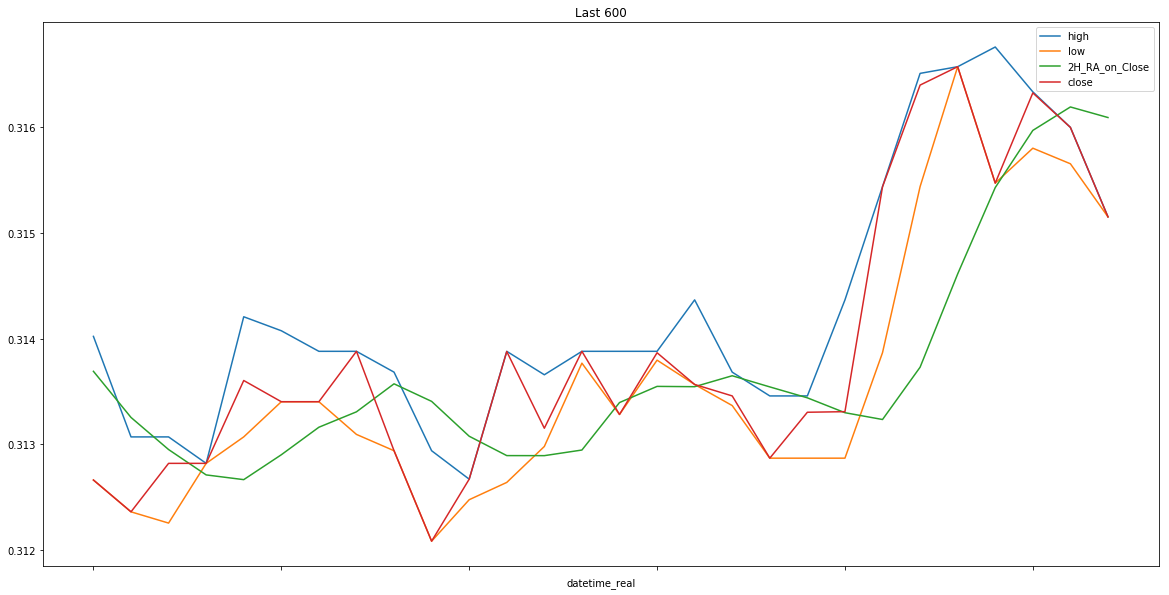

In [22]:
XRP_Analysis_table[['high','low','2H_RA_on_Close','close','datetime_real']][-28:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

In [23]:
XRP_Analysis_table[-28:]['high'].max()

0.31676036

In [24]:
0.31208458

0.31208458

In [25]:
(0.31676036 - 0.31208458)/0.31208458

0.014982412780535387

In [26]:
test_code = XRP_Analysis_table[-5000:]

In [27]:
len(test_code)

5000

In [28]:
test_code['increa_decre'] = test_code['Increase_0.2_percent'] < test_code['Decrease_0.1_percent']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
test_code['is_decre'] = test_code['Increase_0.2_percent'] >= test_code['Decrease_0.1_percent']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
winning_percent = test_code[test_code['increa_decre']]

In [31]:
test_code['below_2H_RA'] =  (test_code['low'] - test_code['2H_RA_on_Close'])/test_code['2H_RA_on_Close']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
test_code['colour'] = test_code['increa_decre'].apply(lambda x: 'Green' if x else 'Orange')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
test_code.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,...,Increase_0.4_percent,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,2H_RA_on_Close,increa_decre,is_decre,below_2H_RA,colour
72735,0.330390,1555709400,2019-04-19 22:30:00,0.330688,0.330390,0.330427,720.492935,238.163179,0.330556,1555736400,...,1555740000,1555713000,1555713000,1555713000,1555713000,0.330455,False,True,-0.000195,Orange
72736,0.330390,1555711200,2019-04-19 23:00:00,0.330390,0.330390,0.330390,0.000000,0.000000,0.330390,1555736400,...,1555740000,1555713000,1555713000,1555713000,1555713000,0.330190,False,True,0.000606,Orange
72737,0.329000,1555713000,2019-04-19 23:30:00,0.329600,0.329000,0.329600,24563.194229,8082.315862,0.329042,1555714800,...,1555714800,1555732800,1555754400,1555754400,1555790400,0.330172,True,False,-0.003551,Green
72738,0.330524,1555714800,2019-04-20 00:00:00,0.330524,0.329078,0.329078,15585.684631,5148.066171,0.330307,1555716600,...,1555716600,1555732800,1555754400,1555754400,1555790400,0.330009,True,False,-0.002822,Green
72739,0.330524,1555716600,2019-04-20 00:30:00,0.330524,0.330524,0.330524,0.000000,0.000000,0.330524,1555738200,...,1555747200,1555718400,1555722000,1555722000,1555732800,0.330076,False,True,0.001356,Orange


### try with by feeding low first, then high, and again with high, then low

In [34]:
starting_asset = 100

In [35]:
test_code.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,...,Increase_0.4_percent,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,2H_RA_on_Close,increa_decre,is_decre,below_2H_RA,colour
72735,0.330390,1555709400,2019-04-19 22:30:00,0.330688,0.330390,0.330427,720.492935,238.163179,0.330556,1555736400,...,1555740000,1555713000,1555713000,1555713000,1555713000,0.330455,False,True,-0.000195,Orange
72736,0.330390,1555711200,2019-04-19 23:00:00,0.330390,0.330390,0.330390,0.000000,0.000000,0.330390,1555736400,...,1555740000,1555713000,1555713000,1555713000,1555713000,0.330190,False,True,0.000606,Orange
72737,0.329000,1555713000,2019-04-19 23:30:00,0.329600,0.329000,0.329600,24563.194229,8082.315862,0.329042,1555714800,...,1555714800,1555732800,1555754400,1555754400,1555790400,0.330172,True,False,-0.003551,Green
72738,0.330524,1555714800,2019-04-20 00:00:00,0.330524,0.329078,0.329078,15585.684631,5148.066171,0.330307,1555716600,...,1555716600,1555732800,1555754400,1555754400,1555790400,0.330009,True,False,-0.002822,Green
72739,0.330524,1555716600,2019-04-20 00:30:00,0.330524,0.330524,0.330524,0.000000,0.000000,0.330524,1555738200,...,1555747200,1555718400,1555722000,1555722000,1555732800,0.330076,False,True,0.001356,Orange


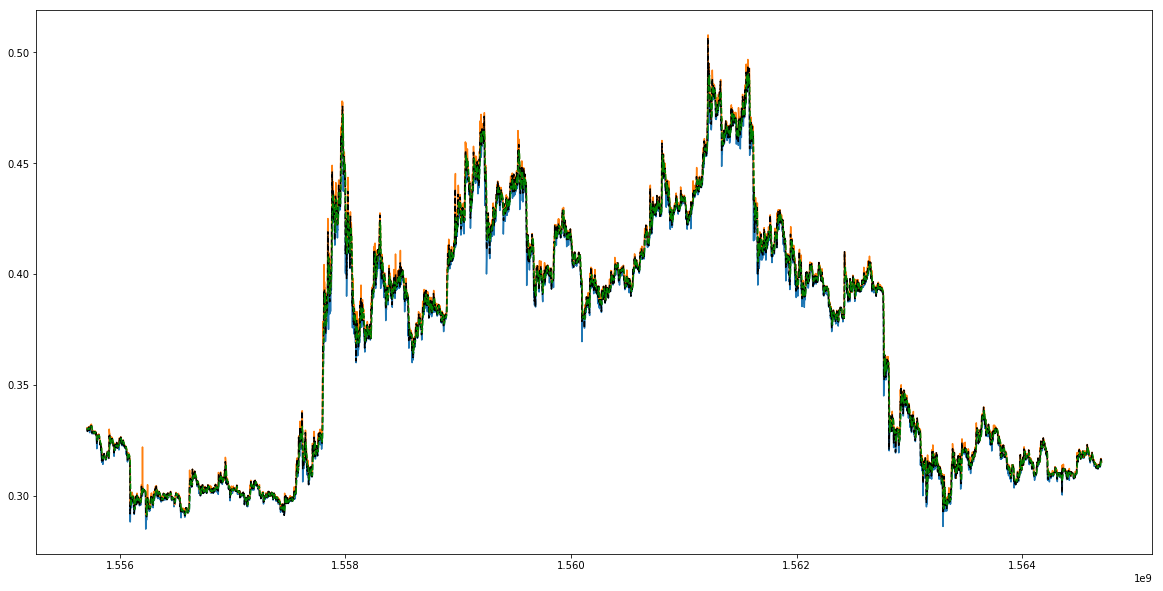

In [36]:
plt.plot(test_code['date'], test_code['low'])
plt.plot(test_code['date'], test_code['high'])
plt.plot(test_code['date'], test_code['close'], 'k--')
plt.plot(test_code['date'], test_code['2H_RA_on_Close'], 'g--')

In [37]:
len(test_code)

5000

In [38]:
np.arange(0,len(test_code), 500)

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

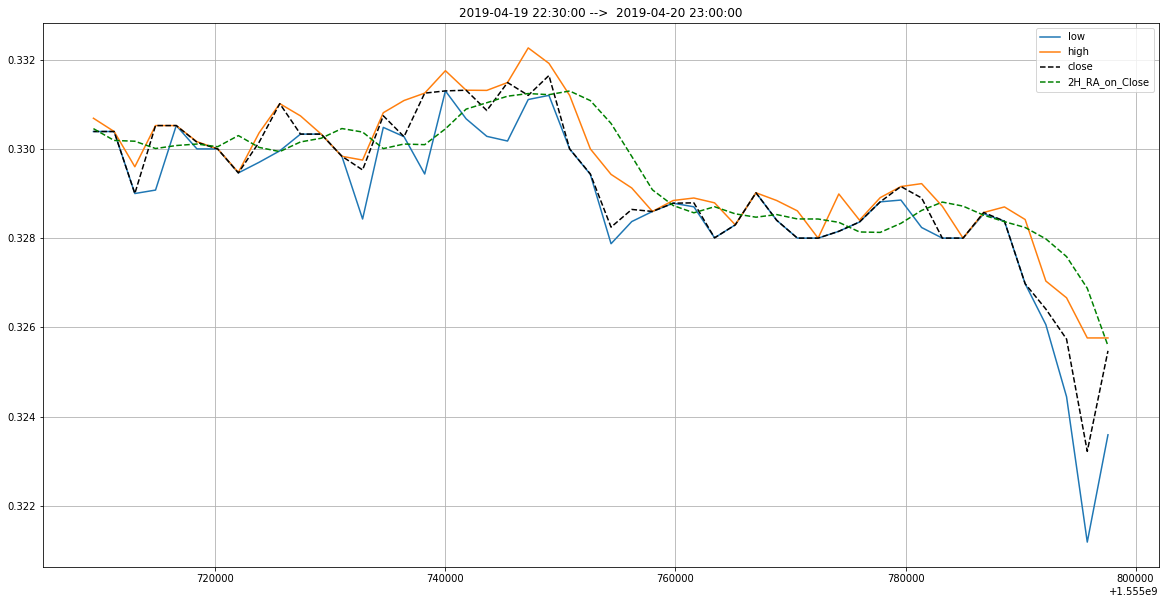

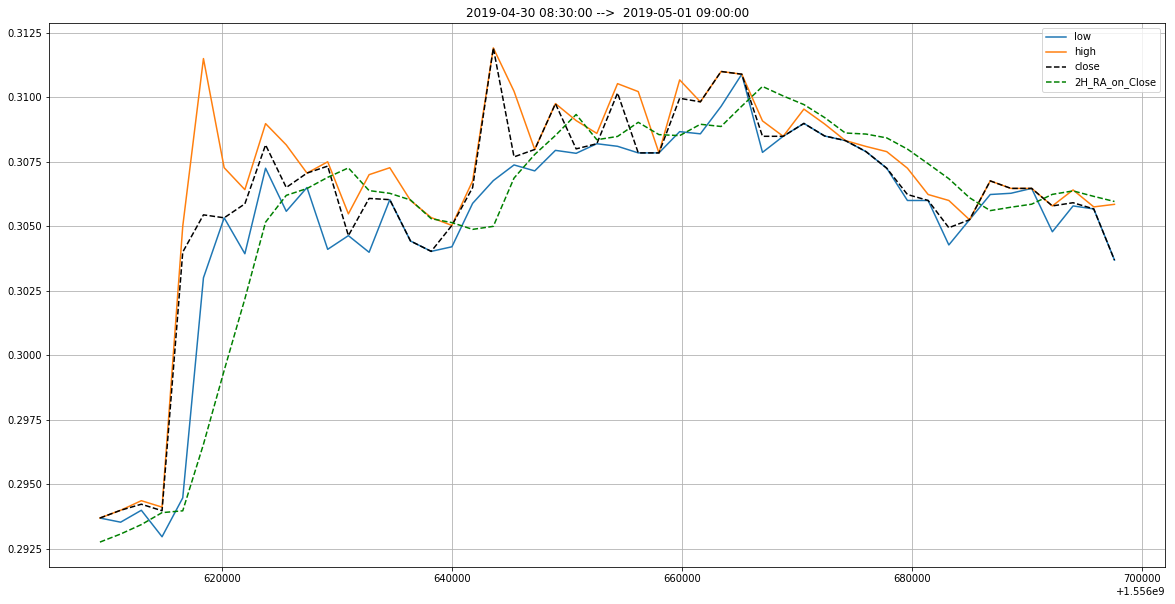

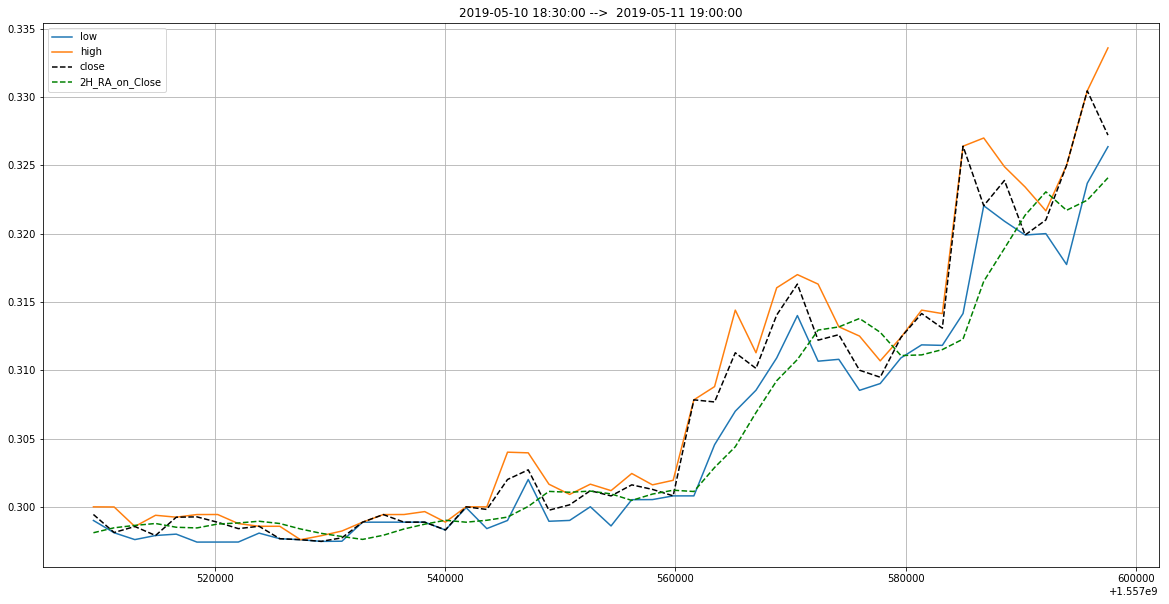

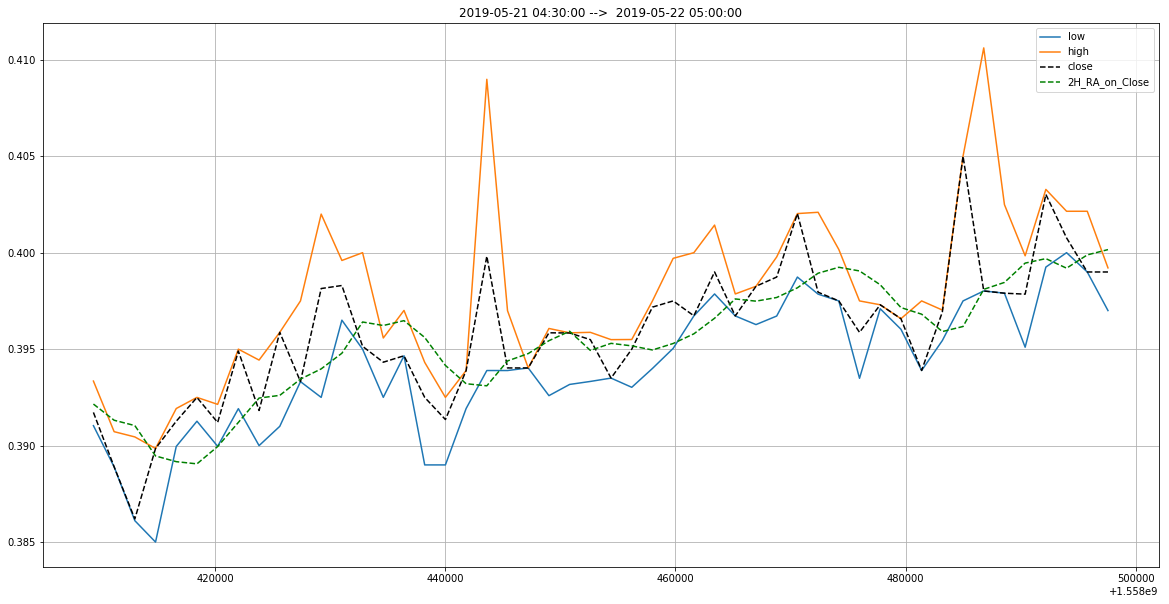

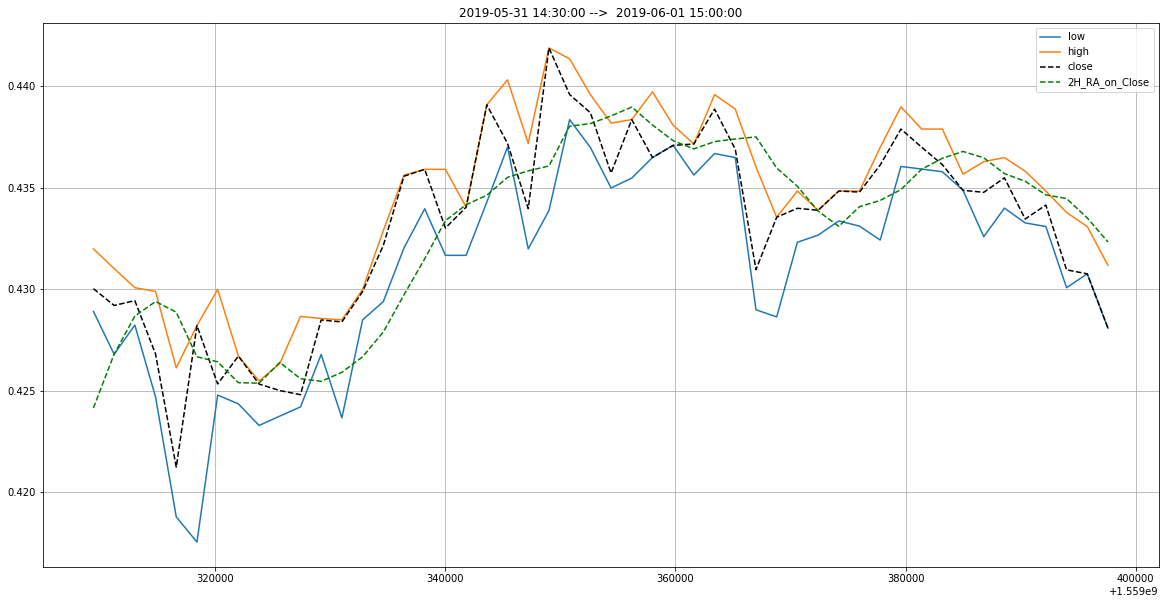

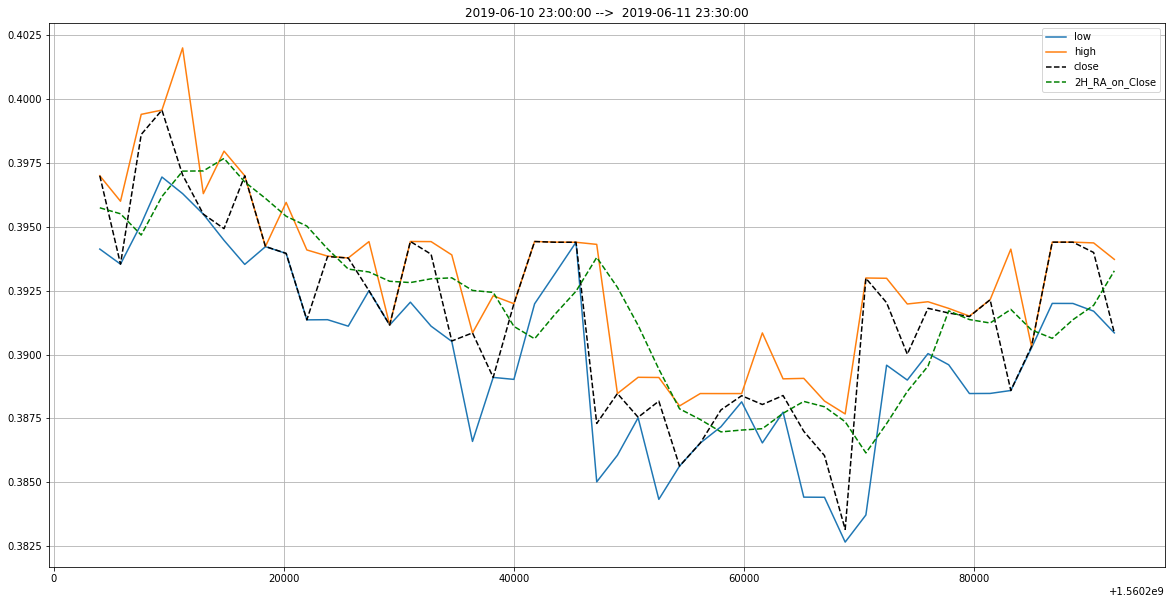

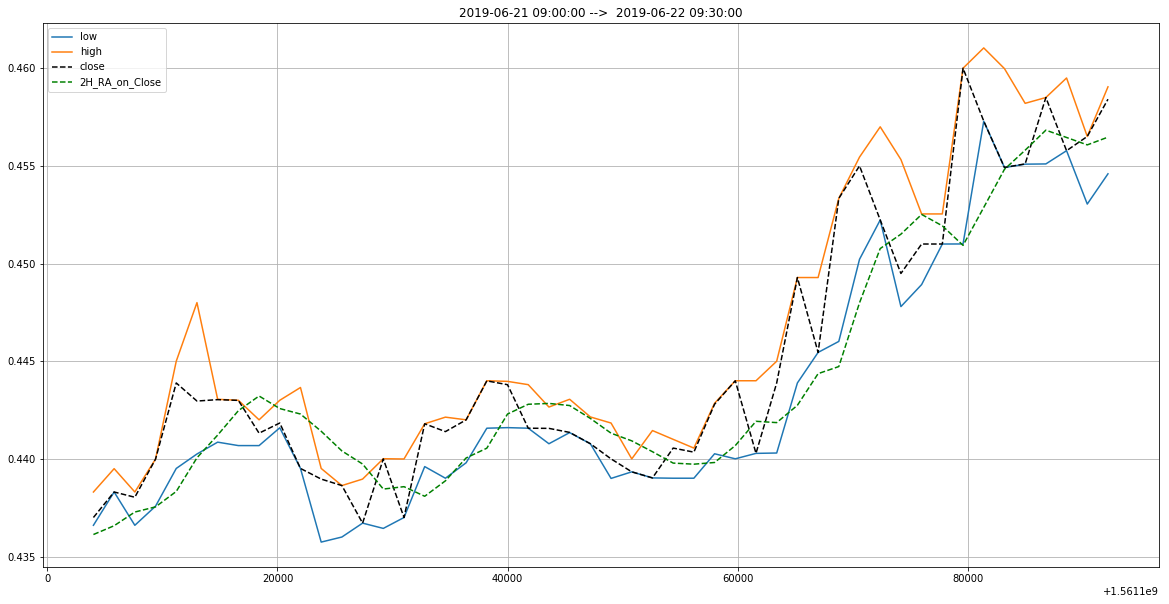

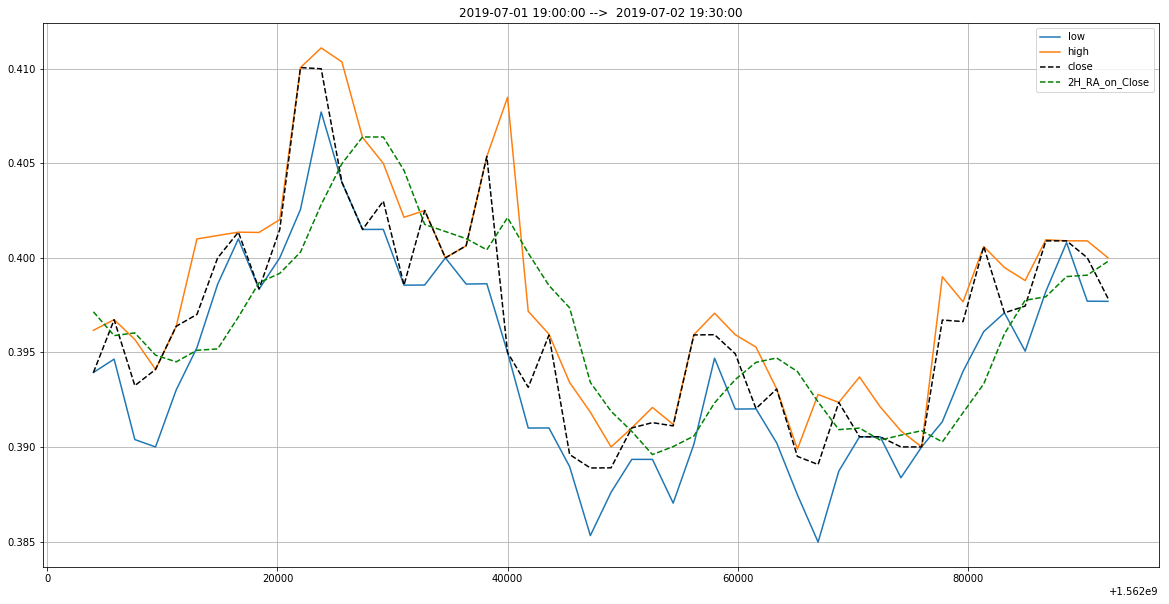

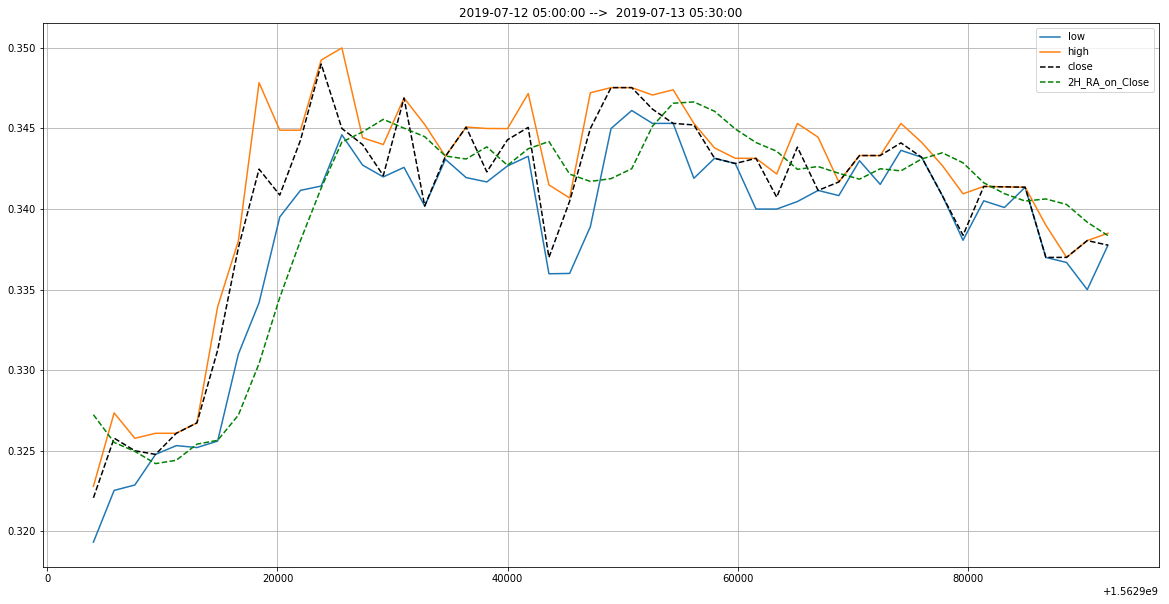

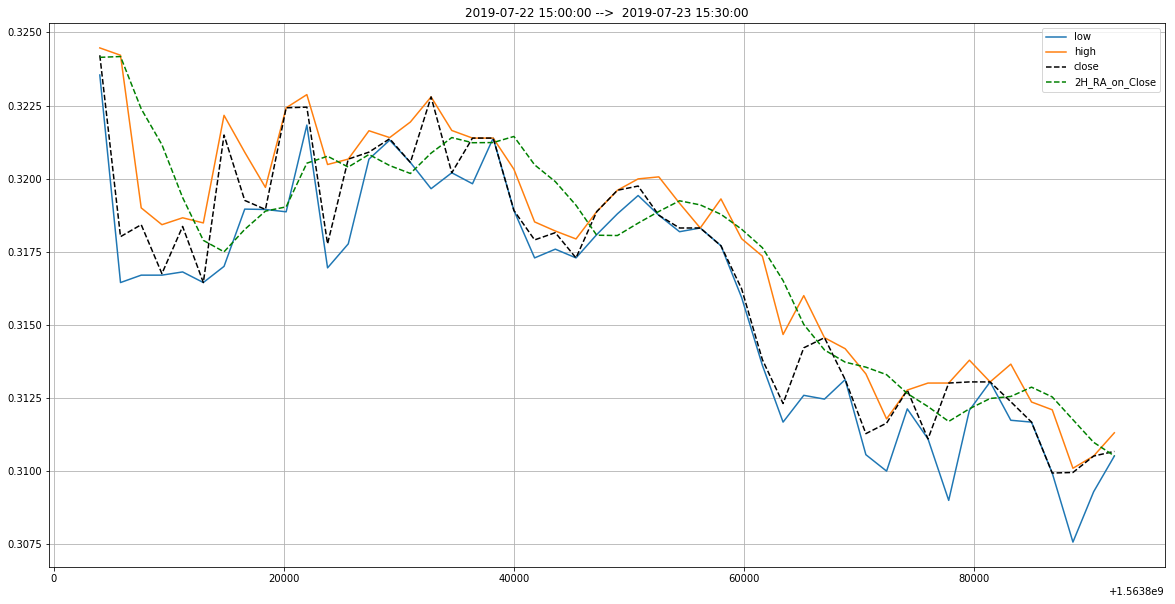

In [39]:
break_down_points = np.arange(0,len(test_code), 500)

for value in break_down_points:
    temp_table = test_code[value: value+50]
    
    plt.plot(temp_table['date'], temp_table['low'], label ='low')
    plt.plot(temp_table['date'], temp_table['high'], label ='high')
    plt.plot(temp_table['date'], temp_table['close'], 'k--', label ='close')
    plt.plot(temp_table['date'], temp_table['2H_RA_on_Close'], 'g--', label ='2H_RA_on_Close')
    plt.title('{0} -->  {1}'.format(temp_table['datetime_real'].min(), temp_table['datetime_real'].max()))
    plt.grid()
    plt.legend()
    plt.show()

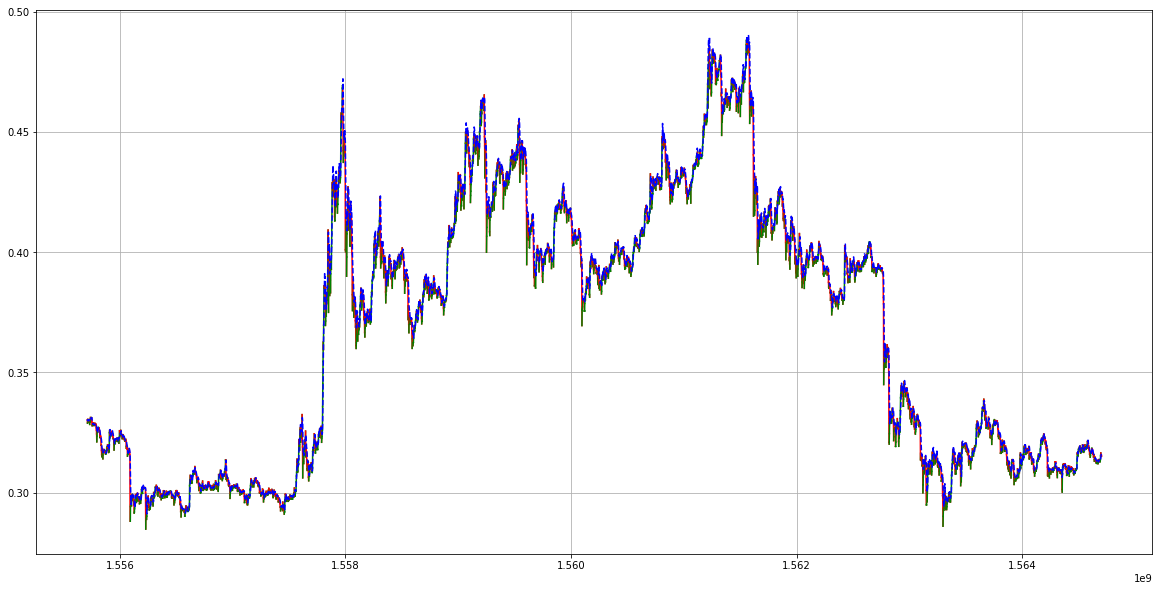

In [40]:
x = test_code['date']
y = test_code['low']
color = test_code['colour']



for x_p, x_p1, y_p, y_p1 , c_p in zip(x, x[1:] , y, y[1:], color):
    if c_p == 'Green':
        plt.plot([x_p,x_p1], [y_p,y_p1], 'g-')
        
    else:
        plt.plot([x_p,x_p1], [y_p,y_p1] ,'r')


plt.plot(test_code['date'], test_code['2H_RA_on_Close'], 'b--')
plt.grid()
plt.show()


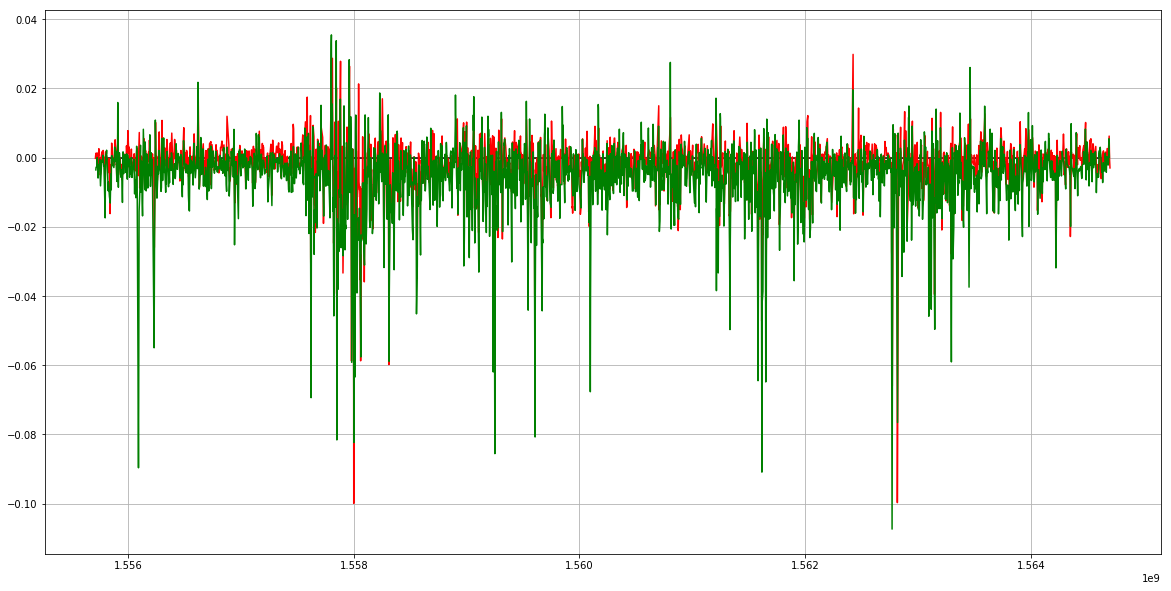

In [41]:
g1 = test_code[~test_code['increa_decre']][['date','below_2H_RA']]
g2 = test_code[test_code['increa_decre']][['date','below_2H_RA']]

plt.plot(g1['date'], g1['below_2H_RA'], 'r', label = 'loss')
plt.plot(g2['date'], g2['below_2H_RA'] , 'g' , label =  'gain')

plt.hlines(y= 0 , xmin = test_code['date'].min() , xmax= test_code['date'].max())
plt.grid()
plt.show()

In [42]:
pd.DataFrame([10,10,30]).describe()

,0
count,3.000000
mean,16.666667
std,11.547005
min,10.000000
25%,10.000000
50%,10.000000
75%,20.000000
max,30.000000


In [43]:
pd.DataFrame([1,1,3]).describe()

,0
count,3.000000
mean,1.666667
std,1.154701
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [44]:
g1['below_2H_RA'].describe()

count    2044.000000
mean       -0.003053
std         0.008431
min        -0.099928
25%        -0.005704
50%        -0.001611
75%         0.001089
max         0.029846
Name: below_2H_RA, dtype: float64

In [45]:
g2['below_2H_RA'].describe()

count    2956.000000
mean       -0.004686
std         0.009827
min        -0.107349
25%        -0.007210
50%        -0.003047
75%         0.000061
max         0.035470
Name: below_2H_RA, dtype: float64

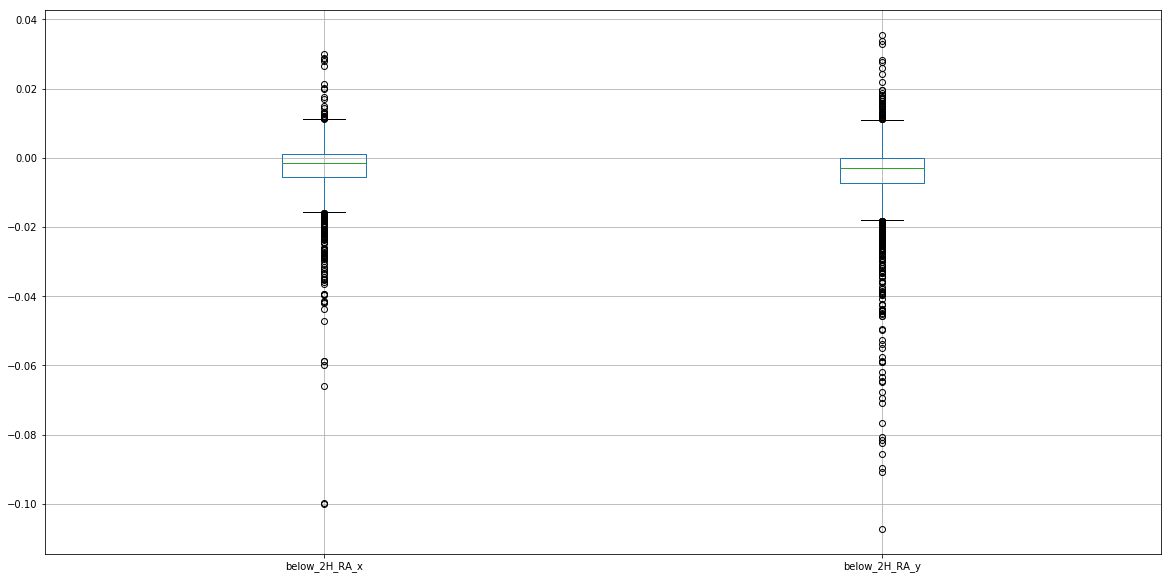

In [46]:
g1.merge(g2, on ='date', how='outer').boxplot(column=['below_2H_RA_x','below_2H_RA_y'])

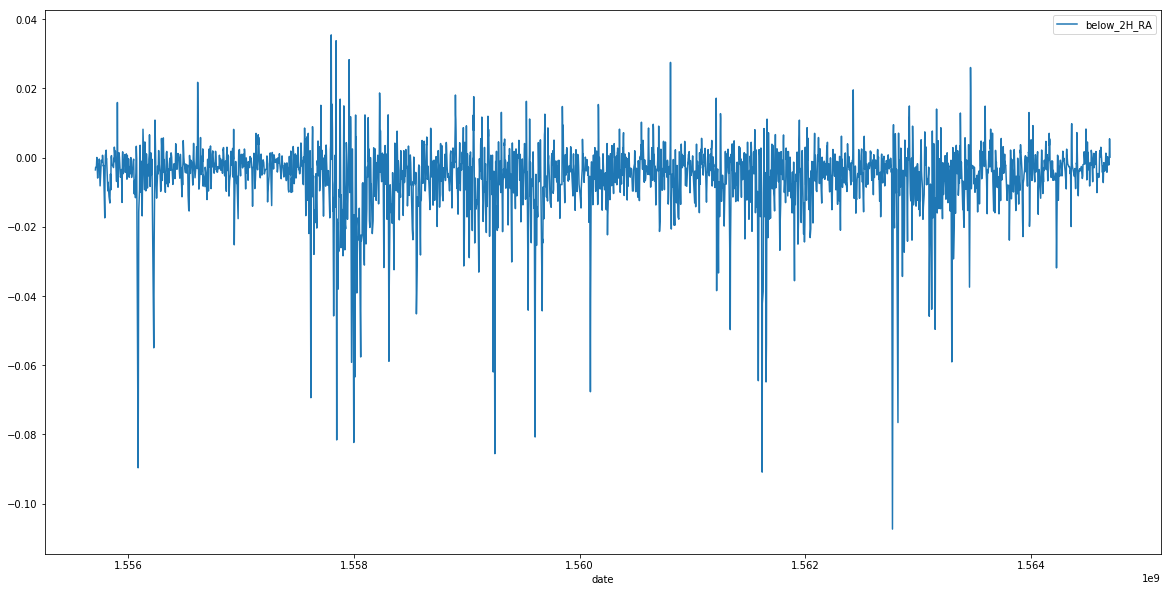

In [47]:
test_code[test_code['increa_decre']][['date','below_2H_RA']].set_index('date').plot()

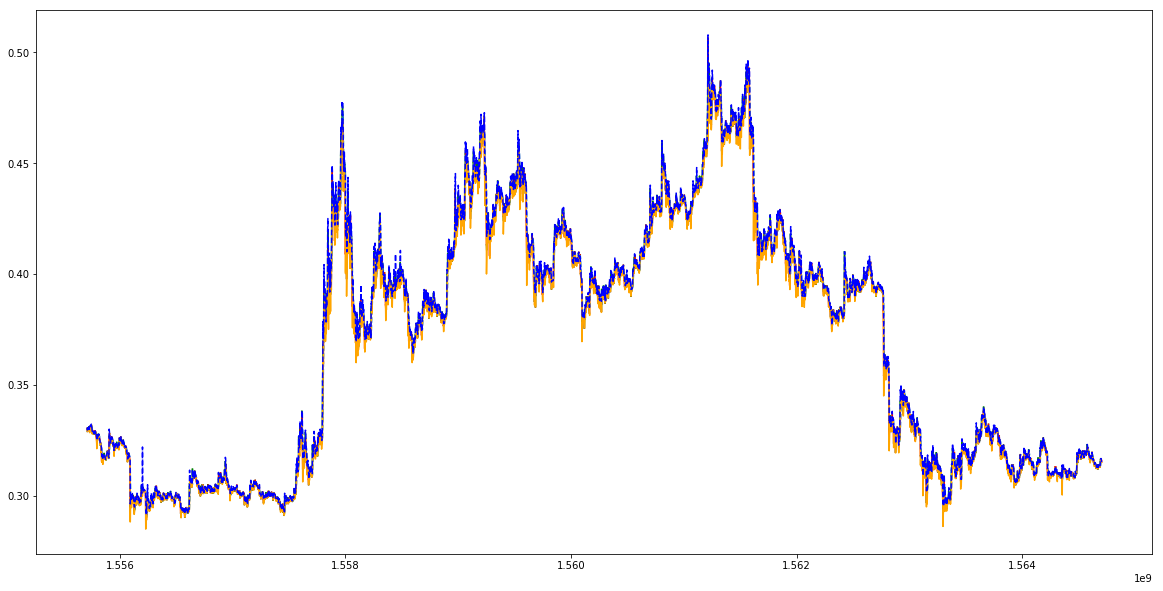

In [48]:
x = test_code['date']
y = test_code['close']
y_low = test_code['low']
y_high = test_code['high']
ra = test_code['2H_RA_on_Close']
color = test_code['colour']

for x_p, x_p1, y_p, y_p1 , c_p in zip(x, x[1:] , y, y[1:], color):
    if c_p == 'Green':
        plt.plot([x_p,x_p1], [y_p,y_p1], 'g-')
        
    else:
        plt.plot([x_p,x_p1], [y_p,y_p1] ,'r')
        
plt.plot(x, ra,'--')
plt.plot(x, y_low,'orange')
plt.plot(x, y_high, 'b--')
plt.show()

## Running trade

- for 0.004 before 2H

0.4% below

each trade costs: 0.2% (so each sell needs to deduct 0.2%)

low supply first, then high

In [156]:
XRP_Analysis_table.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,2H_RA_on_Close
0,0.024997,1424462400,2015-02-20 20:00:00,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
1,0.024997,1424464200,2015-02-20 20:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
2,0.024997,1424466000,2015-02-20 21:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
3,0.024997,1424467800,2015-02-20 21:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
4,0.024997,1424469600,2015-02-20 22:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997


In [ ]:


def action_decision(action_time, value, RA_2H_Value):
    
    
    
    

In [157]:
for ind, df in XRP_Analysis_table[-5:].iterrows():
    print(df['date'])

1564695000
1564696800
1564698600
1564700400
1564702200


In [49]:
XRP_Analysis_table

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,2H_RA_on_Close
0,0.024997,1424462400,2015-02-20 20:00:00,0.024997,0.024997,0.024997,0.146700,0.003667,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
1,0.024997,1424464200,2015-02-20 20:30:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
2,0.024997,1424466000,2015-02-20 21:00:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
3,0.024997,1424467800,2015-02-20 21:30:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,NaN
4,0.024997,1424469600,2015-02-20 22:00:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997
5,0.024997,1424471400,2015-02-20 22:30:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997
6,0.024997,1424473200,2015-02-20 23:00:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997
7,0.024997,1424475000,2015-02-20 23:30:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997
8,0.024997,1424476800,2015-02-21 00:00:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997
9,0.024997,1424478600,2015-02-21 00:30:00,0.024997,0.024997,0.024997,0.000000,0.000000,0.024997,1455001200,1455001200,1455001200,1424964600,1424964600,1424964600,1424964600,0.024997


In [50]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.01
sell_limit = 0.004

while gold_available >= 0:
    
    for ind, df in XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2019-07-07'].iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= drop_limit:
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )
                
                if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [51]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [52]:
transation_log.head()

,Gold,XRP_Amount,action,price_action_happened
1562454000,0.00,257.6368,brought,0.387367
1562455800,100.37,0.0000,sell_profit,0.390355
1562457600,0.00,258.4311,brought,0.387600
1562459400,100.51,0.0000,sell_profit,0.389700
1562470200,0.00,258.8278,brought,0.387548


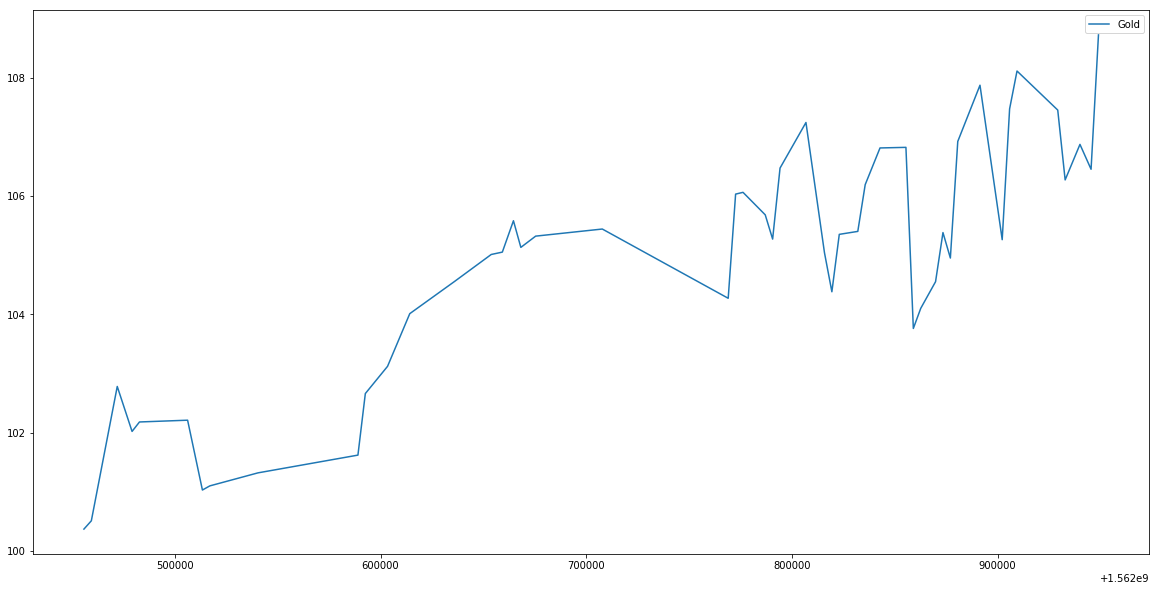

In [53]:
transation_log[transation_log['action'] != 'brought'][:50][['Gold']].plot()

In [246]:
1499394600

1499517000

1499517000

In [245]:
XRP_Analysis_table[XRP_Analysis_table['date'].isin([1499394600,1499517000])]

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,2H_RA_on_Close
41428,0.247143,1499394600,2017-07-07 03:30:00,0.2500,0.247143,0.248800,135533.760057,33550.050609,0.247540,1499396400,1499396400,1499398200,1499398200,1499398200,1499398200,1499400000,0.249663
41496,0.219800,1499517000,2017-07-08 13:30:00,0.2198,0.219086,0.219086,92286.901180,20281.698605,0.219768,1499518800,1499518800,1499520600,1499518800,1499518800,1499518800,1499518800,0.218102


In [243]:
transation_log[:50]

,Gold,XRP_Amount,action,price_action_happened
1499394600,0.00,403.8141,brought,0.247143
1499398200,100.19,0.0000,sell_profit,0.248600
1499400000,0.00,407.4451,brought,0.245400
1499401800,100.74,0.0000,sell_profit,0.247741
1499409000,0.00,410.4810,brought,0.244926
1499410800,99.11,0.0000,stop_loss_hit,0.241927
1499412600,0.00,415.9369,brought,0.237800
1499414400,97.88,0.0000,stop_loss_hit,0.235801
1499416200,0.00,414.6284,brought,0.235600
1499418000,97.52,0.0000,stop_loss_hit,0.235667
